<a href="https://colab.research.google.com/github/kanovotn/freecodecamp-projects/blob/main/sea_level_predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

In [9]:
df = pd.read_csv("drive/MyDrive/Colab Notebooks/datasets/epa-sea-level.csv")
df.head()

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1880,0.000000,-0.952756,0.952756,NaN
1,1881,0.220472,-0.732283,1.173228,NaN
2,1882,-0.440945,-1.346457,0.464567,NaN
3,1883,-0.232283,-1.129921,0.665354,NaN
4,1884,0.590551,-0.283465,1.464567,NaN


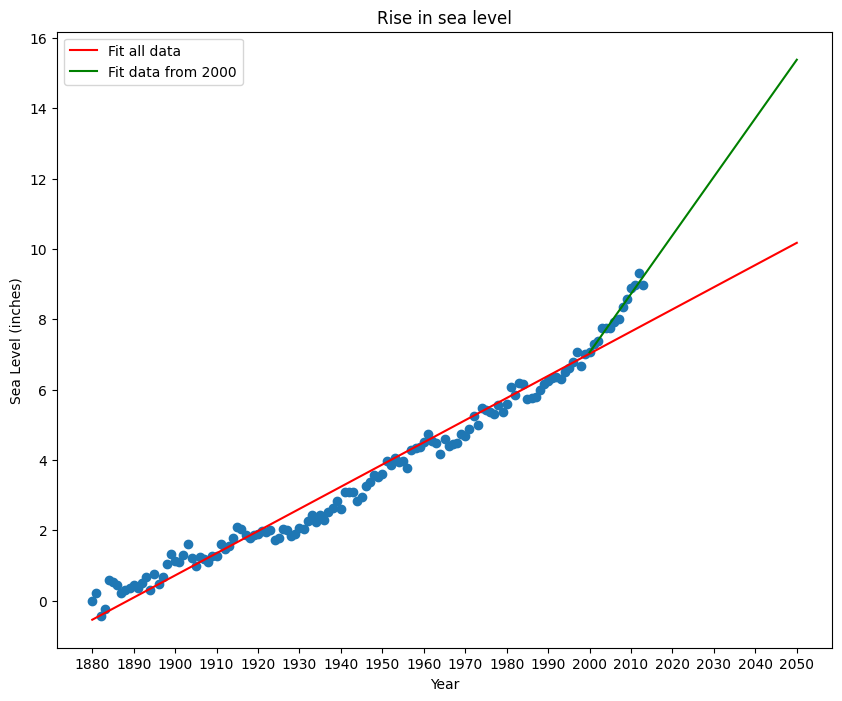

In [37]:
# Range of years to visualize
years_extended = range(df['Year'].min(), 2051)  # Extending to 2050
years_extended_2000 = range(2000, 2051)  # From 2000

# Linear regression on whole dataset
res = stats.linregress(df['Year'], df['CSIRO Adjusted Sea Level'])

# Linear regression from 2000
df_2000 = df[df['Year'] >= 2000]
res2000 = stats.linregress(df_2000['Year'], df_2000['CSIRO Adjusted Sea Level'])


plt.figure(figsize=(10, 8))
plt.scatter(df['Year'], df['CSIRO Adjusted Sea Level'])
plt.plot(years_extended, res.intercept + res.slope * years_extended, 'r', label='Fit all data')
plt.plot(years_extended_2000, res2000.intercept + res2000.slope * years_extended_2000, 'g', label='Fit data from 2000')

plt.xticks(range(df['Year'].min(), 2051, 10))
plt.xlabel('Year')
plt.ylabel('Sea Level (inches)')
plt.title('Rise in sea level')
plt.legend()
plt.show()